# Heart Disease

## I. Project Tasks

### Define your scope
My primary goal is to continue using the skills I learned on Codecademy. Specifically, I want to clean/tidy data, look for trends, and create a visualization that tells a story. This is a low-key project; machine learning and data mining algorithms are outside of my scope. After thinking it over, I think I will look for correlations and run statistical tests (i.e. Pearson) in Jupyter, and display the highest correlating variables in Tableau.

### Decide on a question or topic
I decided to choose a topic related to medicine - heart disease. I dispense all kinds of medications that treat heart conditions on a daily basis.

### Find a dataset
I went to kaggle and found the dataset "Heart Disease Dataset" provided by Mexwell (link here https://www.kaggle.com/datasets/mexwell/heart-disease-dataset).

### Define your problem
After a brief glance at the dataset and the documentation, I would like to find what makes people with heart disease different from those without heart disease. 

### Load and check data
Documentation is mostly clear (the Units column consists of units and/or ranges and/or descriptions
) and I can identify what each variable is measuring, except for the ST segment variables. Specifically, for the 'oldpeak' variable, I do not know what the numbers represents (documentation says the units are 'depression'), and how it relates to the 'ST slope' variable. I was not familiar with the term 'old peak', and decided to familiarize myself with it before getting too far along.

I found that the units for _oldpeak_ are likely mm on an EKG. The first hits on Google were unhelpful, and I am making this assumption based on what I read about ST slopes.

Image describing ST slopes: https://litfl.com/wp-content/uploads/2018/10/ST-segment-depression-upsloping-downsloping-horizontal.png


### Data wrangling and tidying (in progress)
Kaggle gave this dataset a score of 10.00 out of 10.00 for usability, but one person on Kaggle commented that about 150 people had a cholesterol level of zero, so I will review the dataset for missing values or other possible errors. 

### Find the story (to do)
What, in one sentence, do you want your audience to take away from your project? You may have to create all of your visualizations, do all of your explorations, and even get feedback before you know what it is. But, take a moment to decide the one thing people should take away from your project and make that the first thing. Make that story the easiest one to find.

### Communicate your findings (to do)
This could be in the shape of a report, a Tableau Dashboard, a slide deck, etc. The best way to decide is to imagine your audience. Who are they? Where do you envision reaching them? What is the best medium for that?\
Do you want to reach other people interested in your topic? Do you want to persuade someone to care about something? Do you want to focus on business stakeholders? Where might you find each group? Tailor your project to that imagined scenario.\
From there, you can start to create a project to communicate your story with them.

### Wrap up (to do)
This step might be the most impactful for finding a job. Now that you’ve written your report, created your deck, or built your dashboard, check your work. Go through and proofread. Try to view your project from wherever you decided to host it. Make sure that all of the links work, and ask a friend (or visit the forums) to find someone to go through it and tell you if there are any inconsistencies, jumps of logic, or confusing parts. This final round of checks is essential for creating a polished project.

## II. Load data

In [1]:
import pandas as pd
# pd.options.mode.copy_on_write = True
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

heart_df = pd.read_csv(r'C:\Users\jsbit\OneDrive\Documents\Coding 2023\Git\heart-disease\heart_statlog_cleveland_hungary_final.csv', encoding_errors='replace')

In [2]:
print('There were', str(len(heart_df)), 'participants in this dataset.')
# Although 1,190 participants is a lot, 'heart disease' is a large umbrella term and can affect almost anyone.
# Therefore, I estimate that this dataset not meet power and we can't extrapolate findings to the general public.

There were 1190 participants in this dataset.


In [3]:
print("The column names are:\n", heart_df.columns)

The column names are:
 Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [4]:
# Explanation of changes to variable names:
    # Because of my German heritage, I prefer EKG instead of ECG.
    # I see an inconsistenct in abbreviating 'bp', but spelling out 'blood sugar', so I will abbreviate them all.
        # For clarification I added 'systolic' before 'bp'
    # I think 'ST depression' is a better variable name than 'oldpeak'. 
        # I can't find much information on why it is called old peak
        # It's a measure of the ST depression in mm on an EKG
        # If it's a measure of depression, why is it called peak?
    # I decided I prefer the variable name 'stress_test' over 'exercise_angina', 
        # especially since I will be converting values to 'angina' or 'no angina'
    # I prefer 'heart disease category' to 'target', it feels more descriptive

heart_df = heart_df.rename(columns={'resting ecg': 'ekg', 
                                    'chest pain type': 'pain type', 
                                    'fasting blood sugar': 'fbs', 
                                    'max heart rate': 'max hr', 
                                    'resting bp s': 'systolic bp',
                                    'oldpeak': 'ST depression',
                                    'exercise angina': 'stress test',
                                    'target': 'heart disease category'})

In [5]:
# While I'm at it, might as well replace spaces with underscores.
heart_df.columns = [variable.replace(' ', '_') for variable in heart_df]

print("The new column names are:\n", heart_df.columns)

The new column names are:
 Index(['age', 'sex', 'pain_type', 'systolic_bp', 'cholesterol', 'fbs', 'ekg',
       'max_hr', 'stress_test', 'ST_depression', 'ST_slope',
       'heart_disease_category'],
      dtype='object')


## III. Initial Exploratory Data Analysis
### Dataset overview and descriptive statistics

In [6]:
print(heart_df.describe(include='all'))

               age          sex    pain_type  systolic_bp  cholesterol  \
count  1190.000000  1190.000000  1190.000000  1190.000000  1190.000000   
mean     53.720168     0.763866     3.232773   132.153782   210.363866   
std       9.358203     0.424884     0.935480    18.368823   101.420489   
min      28.000000     0.000000     1.000000     0.000000     0.000000   
25%      47.000000     1.000000     3.000000   120.000000   188.000000   
50%      54.000000     1.000000     4.000000   130.000000   229.000000   
75%      60.000000     1.000000     4.000000   140.000000   269.750000   
max      77.000000     1.000000     4.000000   200.000000   603.000000   

               fbs          ekg       max_hr  stress_test  ST_depression  \
count  1190.000000  1190.000000  1190.000000  1190.000000    1190.000000   
mean      0.213445     0.698319   139.732773     0.387395       0.922773   
std       0.409912     0.870359    25.517636     0.487360       1.086337   
min       0.000000     0.0000

* Each variable has a count of 1,190, so it's free of NAN.
* I know that some values are zero; this is just initial exploration and I will review these numbers again later.
* Age:
    * I am somewhat surprised that the max age was only 77; it would be nice to know the inclusion criteria for these studies (i.e. if there was a max age for some but not others).
    * It looks like this will have a normal distribution; the distance of the 25th and 75th percentile from the median and the distance of the min and max from the median are similar.
* Sex: The mean and median indicate that most participants were male.
* Resting blood pressure (systolic):
    * Minimum was zero; not a realistic number.
    * The average seems lower than I might have guessed. I am assuming that lots of people have high blood pressure (i.e. systolic over 130 mmHg), hopefully it isn't skewed a lot by missing/zero values.
* Cholesterol:
    * Minimum was zero; not a realistic number.
    * It seems like most people had an elevated cholesterol (over 200 mg/dL)
* Fasting blood sugar over 120 mg/dL: Looks like most people were normal (value of zero).
* Max heart rate (during stress test and in beats per minute, I assume):
    * I don't normally see stress test results, so this is interesting data to me.
    * A min of 60 bpm - someone must be on some strong beta blockers or experienced angina rather quickly.
* Exercise-induced angina: Looks like most people did not experience angina.
* Oldpeak: This could get trippy - a negative ST depression is ST elevation (min of -2.6 mm)
* Target: A slight majority were classified as having heart disease.    

## IV. Data wrangling and tidying

### Data types and observations

In [7]:
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1190 non-null   int64  
 1   sex                     1190 non-null   int64  
 2   pain_type               1190 non-null   int64  
 3   systolic_bp             1190 non-null   int64  
 4   cholesterol             1190 non-null   int64  
 5   fbs                     1190 non-null   int64  
 6   ekg                     1190 non-null   int64  
 7   max_hr                  1190 non-null   int64  
 8   stress_test             1190 non-null   int64  
 9   ST_depression           1190 non-null   float64
 10  ST_slope                1190 non-null   int64  
 11  heart_disease_category  1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


#### Data values
* Leave as numbers:
    * age
    * systolic_bp 
    * cholesterol
    * max_hr
    * ST_depression
    
* Change from numbers to description (using description found in documentation unless otherwise noted):
    * sex: 0: female, 1: male
    * pain_type: 1: typical, 2: atypical, 3: non-anginal, 4: asymptomatic
    * fbs (using my own words): 0: normal, 1: elevated
    * ekg (using my own words): 0: normal, 1: ST abnormality, 2: LVH (abbreviated from left ventricular hypertrophy)
    * stress_test: 0: no angina, 1: angina
    * ST_slope: 0 (my own words - not found in documentation): not evaluated, 1: upsloping, 2: flat, 3: downsloping
    * heart_disease_category: 0: normal, 1: heart disease

In [8]:
heart_df['sex'] = heart_df.sex.replace(
    0, 'female').replace(
    1, 'male')

heart_df['pain_type'] = heart_df.pain_type.replace(
    1, 'typical').replace(
    2, 'atypical').replace(
    3, 'non-anginal').replace(
    4, 'asymptomatic')

heart_df['fbs'] = heart_df.fbs.replace(
    0, 'normal').replace(
    1, 'elevated')

heart_df['ekg'] = heart_df.ekg.replace(
    0, 'normal').replace(
    1, 'ST abnormality').replace(
    2, 'LVH')

heart_df['stress_test'] = heart_df.stress_test.replace(
    0, 'no angina').replace(
    1, 'angina')

heart_df['ST_slope'] = heart_df.ST_slope.replace(
    0, 'not evaluated').replace(
    1, 'upsloping').replace(
    2, 'flat').replace(
    3, 'downsloping')

heart_df['heart_disease_category'] = heart_df.heart_disease_category.replace(
    0, 'normal').replace(
    1, 'heart disease')

print('Values for the sex variable:', str(heart_df.sex.unique()))
print('Values for pain type:', str(heart_df.pain_type.unique()))
print('Values for fasting blood sugar:', str(heart_df.fbs.unique()))
print('Values for EKG:', str(heart_df.ekg.unique()))
print('Values for stress test:', str(heart_df.stress_test.unique()))
print('Values for ST slope:', str(heart_df.ST_slope.unique()))
print('Values for heart disease category:', str(heart_df.heart_disease_category.unique()))

Values for the sex variable: ['male' 'female']
Values for pain type: ['atypical' 'non-anginal' 'asymptomatic' 'typical']
Values for fasting blood sugar: ['normal' 'elevated']
Values for EKG: ['normal' 'ST abnormality' 'LVH']
Values for stress test: ['no angina' 'angina']
Values for ST slope: ['upsloping' 'flat' 'downsloping' 'not evaluated']
Values for heart disease category: ['normal' 'heart disease']


#### Data types
* Appropriate data type:
    * Age
    * Blood pressure, systolic (systolic_bp)
    * Cholesterol
    * Max heart rate
    * ST depression
    
* Needs changed:
    * Sex: Binary nominal categotical
    * Pain type: Nominal categorical
    * EKG: Nominal categorical
    * Fasting blood sugar (fbs)
    * Exercise-induced angina: Binary nominal categorical
    * ST slope: Ordinal categorical
    * Heart disease category: Nominal categorical  

In [9]:
heart_df = heart_df.astype({
    'sex': 'category',
    'pain_type': 'category',
    'ekg': 'category',
    'fbs': 'category', 
    'stress_test': 'category',
    'ST_slope': 'category',
    'heart_disease_category': 'category'})

print('Data types for all variables:\n', heart_df.dtypes)

Data types for all variables:
 age                          int64
sex                       category
pain_type                 category
systolic_bp                  int64
cholesterol                  int64
fbs                       category
ekg                       category
max_hr                       int64
stress_test               category
ST_depression              float64
ST_slope                  category
heart_disease_category    category
dtype: object


### Checking for and handling duplicates

In [10]:
duplicated_hearts = heart_df[heart_df.duplicated()].reset_index()
print(duplicated_hearts)
# The index numbers seem interesting in how they are consecutive - are they all that way?
print(duplicated_hearts['index'].to_string())

     index  age     sex     pain_type  systolic_bp  cholesterol       fbs  \
0      163   49  female      atypical          110          208    normal   
1      604   58    male   non-anginal          150          219    normal   
2      887   63    male       typical          145          233  elevated   
3      888   67    male  asymptomatic          160          286    normal   
4      889   67    male  asymptomatic          120          229    normal   
..     ...  ...     ...           ...          ...          ...       ...   
267   1156   42    male   non-anginal          130          180    normal   
268   1157   61    male  asymptomatic          140          207    normal   
269   1158   66    male  asymptomatic          160          228    normal   
270   1159   46    male  asymptomatic          140          311    normal   
271   1160   71  female  asymptomatic          112          149    normal   

                ekg  max_hr stress_test  ST_depression     ST_slope  \
0   

In [11]:
print(duplicated_hearts['index'])

0       163
1       604
2       887
3       888
4       889
       ... 
267    1156
268    1157
269    1158
270    1159
271    1160
Name: index, Length: 272, dtype: int64


In [12]:
# Yes, it looks like each row after row 887 in heart_df is a duplicate. Calculating if visual analysis was accurate:
dup_range = 1160-887 + 1
other_dups = 2
dup_count_check = dup_range + other_dups
print(dup_count_check)
# Since my calculated guess of 276 is higher than 272, it looks like not all rows in the range 887-1161 are duplicates.

276


##### What percent of the data are duplicates?

In [13]:
perc_dup = round(len(duplicated_hearts) / len(heart_df) * 100, 2)
print('About', str(perc_dup), '% of the data is duplicated.')
# Almost a quarter of the data is duplicated - that is a lot.

About 22.86 % of the data is duplicated.


##### How many rows would be left after dropping duplicates?

In [14]:
remainder = len(heart_df) - len(duplicated_hearts)
print('There will be', str(remainder), 'rows remaining after dropping duplicates.')

There will be 918 rows remaining after dropping duplicates.


##### Discussion on handling duplicates: 
The likelihood of having so many duplicates, and the fact that they are basically all grouped together, I think it is safe to drop the duplicates.\
It would have been nice to have a 'trial ID' or 'participant ID' variable, since this dataset is a conglomeration of multiple datasets. I think this would help pinpoint why there are duplicates.

In [15]:
heart = heart_df.drop_duplicates()
print(len(heart))

918


### Handling missing data

I noticed two lab values with a min of zero, which indicates that the participant was dead. These lab values are:
* systolic_bp: Resting blood pressure (systolic)
* cholesterol

First, I will see how many rows have a zero in these three columns.

#### How many values are missing from the bp and cholesterol variables?

In [16]:
zero_heart = heart[(heart['systolic_bp'] == 0) | (heart['cholesterol'] == 0)]
print('There are', str(len(zero_heart)), 'rows with a zero.\n')
# 172 rows is unmanageable for me to look at. I will separate these zeros into their own dataframes and take a closer look.

There are 172 rows with a zero.



#### Identify zeros in resting blood pressure (systolic)

I am curious what other numbers might be out there, so I will include rows with bp from zero to 100. 'Normal' values can go down to 90, below which is considered low.

In [17]:
zero_range_bp = heart[heart['systolic_bp'] < 100]

print('There are', str(len(zero_range_bp)), 'rows that recorded a resting systolic blood pressure less than 100:\n')
# Thirteen rows is manageable for me to look at.
print(zero_range_bp)

There are 13 rows that recorded a resting systolic blood pressure less than 100:

     age     sex     pain_type  systolic_bp  cholesterol       fbs  \
228   38    male  asymptomatic           92          117    normal   
268   34    male      atypical           98          220    normal   
295   32    male       typical           95            0  elevated   
305   51    male  asymptomatic           95            0  elevated   
310   57    male  asymptomatic           95            0  elevated   
315   53    male  asymptomatic           80            0    normal   
329   52    male  asymptomatic           95            0  elevated   
334   40    male  asymptomatic           95            0  elevated   
340   64  female  asymptomatic           95            0  elevated   
450   55    male   non-anginal            0            0    normal   
520   63    male  asymptomatic           96          305    normal   
694   39  female   non-anginal           94          199    normal   
834   51

#### Review of zeros in zero_range_bp
* There was one row with a bp of zero. 
    * This row also had a zero for cholesterol.
* There were 12 other rows with a bp less than 100.
    * The lowest value was 80, the rest were over 90.
    * Eight of these had a cholesterol of zero.

#### Handling missing values
* Possible reasons for missing values:
    * Device malfunctioned; lost power, ran out of batteries, damaged and unusable
    * Protocol not followed and bp/cholesterol were forgotten
    * No blood drawn, lab unable to use blood draw, blood draw misplaced or mislabeled, patient refused blood draw
* The only variables I could realistically check for were bp and cholesterol.
* There was only one row with a missing bp and cholesterol.
* There were 171 other rows with a missing cholesterol value.
* All other variables had complete information, as far as I could tell.
* I will replace zero with NAN for the bp and cholesterol columns.

In [18]:
# Replace zero with NAN in the bp and cholesterol columns:
heart['systolic_bp'] = heart['systolic_bp'].replace( 0, np.nan)
heart['cholesterol'] = heart['cholesterol'].replace( 0, np.nan)

# Checking that zeros were replaced:
print(heart.isna().sum())

# Percent missing values:
print('About {}% of data from the cholesterol column is missing.'.format(round(
    100*heart['cholesterol'].isna().sum()/len(heart))))
# If 1/5 of the data is missing, then the average cholesterol value will go up compared 
    # to my initial calculations... it was already high at 210

age                         0
sex                         0
pain_type                   0
systolic_bp                 1
cholesterol               172
fbs                         0
ekg                         0
max_hr                      0
stress_test                 0
ST_depression               0
ST_slope                    0
heart_disease_category      0
dtype: int64
About 19% of data from the cholesterol column is missing.


C:\Users\jsbit\AppData\Local\Temp\ipykernel_12100\1421904964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['systolic_bp'] = heart['systolic_bp'].replace( 0, np.nan)
C:\Users\jsbit\AppData\Local\Temp\ipykernel_12100\1421904964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart['cholesterol'] = heart['cholesterol'].replace( 0, np.nan)


### Tidying the data
* All variables appropriately named
* All columns are variables


## V. Statistical analyses
In order, I will review:
* Descriptive statistics
* Value counts/proportions
* Distributions with Shapiro-Wilk test
* Contingency tables/frequencies
* Marginal proportions and Chi Square
* Logistic regression

### Descriptive statistics

In [19]:
heart.describe(include='all')
# Much easier to gain insights now that variables are appropriate data types and updated from numbers to descriptions.

,age,sex,pain_type,systolic_bp,cholesterol,fbs,ekg,max_hr,stress_test,ST_depression,ST_slope,heart_disease_category
count,918.000000,918,918,917.000000,746.000000,918,918,918.000000,918,918.000000,918,918
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,4,2
top,NaN,male,asymptomatic,NaN,NaN,normal,normal,NaN,no angina,NaN,flat,heart disease
freq,NaN,725,496,NaN,NaN,704,552,NaN,547,NaN,459,508
mean,53.510893,NaN,NaN,132.540894,244.635389,NaN,NaN,136.809368,NaN,0.887364,NaN,NaN
std,9.432617,NaN,NaN,17.999749,59.153524,NaN,NaN,25.460334,NaN,1.066570,NaN,NaN
min,28.000000,NaN,NaN,80.000000,85.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN
25%,47.000000,NaN,NaN,120.000000,207.250000,NaN,NaN,120.000000,NaN,0.000000,NaN,NaN
50%,54.000000,NaN,NaN,130.000000,237.000000,NaN,NaN,138.000000,NaN,0.600000,NaN,NaN
75%,60.000000,NaN,NaN,140.000000,275.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN


#### Comparison to descriptive statistics at the very beginning of the project:
* I started with 1190 rows. 
    * I removed 272 duplicates, and there are now 918 rows. 
    * There were two variables with missing information: systolic_by and cholesterol. I replaced zero with NAN.
* No variables were significantly affected by the changes mentioned above, except:
    * Minimum for systolic_bp and cholesterol are no longer zero
    * Cholesterol increased
        * Mean jumped from 210 to 244 mg/dL (increase of 34 mg/dL or 16%)
        * Standard deviation dropped from 101 to 59 (decrease by 42 mg/dL)
        * Lowest value now 85 mg/dL
        * 25th percentile increased from 188 to 207 mg/dL (increase of 19 mg/dL or 10%)
        * 50th and 75th percentile increased 8 and 6 mg/dL or <5%, respectively 
        * No change in higest value (603 mg/dL)
    * A few statistics for max_hr decreased slightly
        * Average dipped from 139 tp 136 bpm, <5% change
        * 75th percentile dipped from 160 to 156 bpm, <5% change
    * A few statistics for ST_depression decreased slightly
        * Average decreased from 0.92 to 0.88 mm, < 5% change
        * 75th percentile dipped from 1.6 to 1.5 mm, <5% change
        
#### New observations
* Most values came back 'normal':
    * The most common chest pain type was 'asymptomatic', with a count of 496, accounting for 54% of values
    * The most common fasting blood glucose was 'normal', or below 120 mg/dL, with a count of 704, accounting for 76% of values
    * The most common EKG reading was 'normal', with a count of 552, accounting for 60% of values
    * The most common stress test result was 'no angina', with a count of 547, accounting for 59% of values
    * The most common ST slope was 'flat', with a count of 459, accounting for 50% of values
* Values that were outside the normal limits:
    * Cholesterol was high; at least 50% of participants had a cholesterol level of over 210 mg/dL
    * Blood pressure was elevated; depending on what guidelines you use, about 50% of participants had a resting systolic blood pressure over 130 mmHg
    * Most participants were classified as having heart disease, with a count of 508, accounting for 55% of the data      
    * There are significantly more males than females. There were 193 females, accounting for only 21% of the data.

### Value counts/proportions
Categorical variables are:
* Sex
* Chest pain type
* Fasting blood glucose
* EKG results
* Stress test results
* ST slope

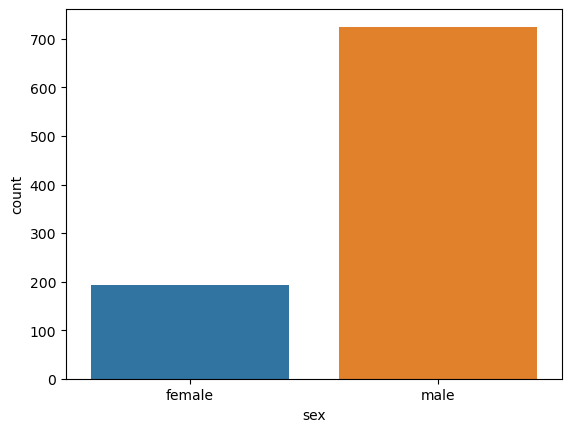

Value counts for sex
male      725
female    193
Name: count, dtype: int64 
 Proportions for sex
male      0.78976
female    0.21024
Name: proportion, dtype: float64 



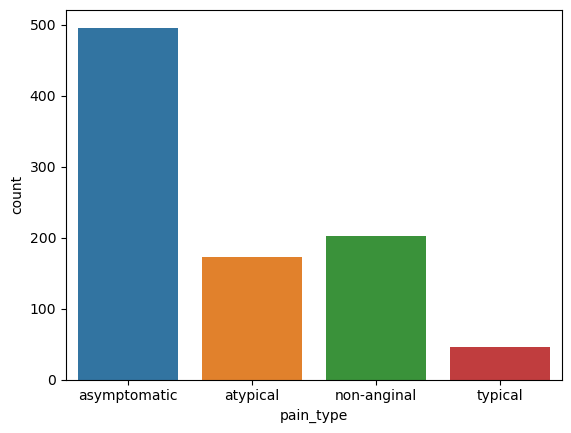

Value counts for pain_type
asymptomatic    496
non-anginal     203
atypical        173
typical          46
Name: count, dtype: int64 
 Proportions for pain_type
asymptomatic    0.540305
non-anginal     0.221133
atypical        0.188453
typical         0.050109
Name: proportion, dtype: float64 



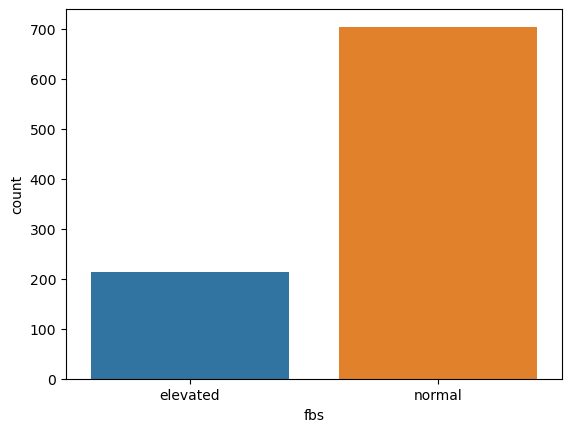

Value counts for fbs
normal      704
elevated    214
Name: count, dtype: int64 
 Proportions for fbs
normal      0.766885
elevated    0.233115
Name: proportion, dtype: float64 



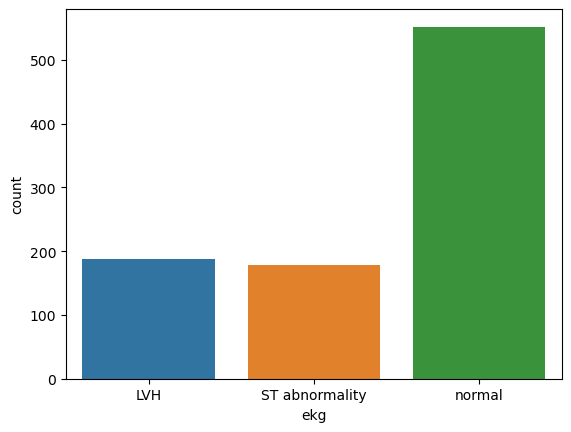

Value counts for ekg
normal            552
LVH               188
ST abnormality    178
Name: count, dtype: int64 
 Proportions for ekg
normal            0.601307
LVH               0.204793
ST abnormality    0.193900
Name: proportion, dtype: float64 



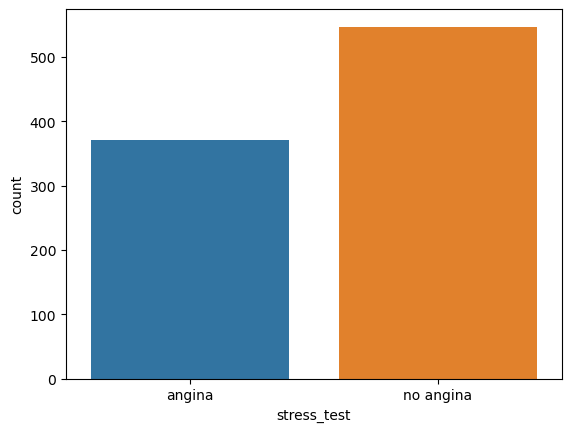

Value counts for stress_test
no angina    547
angina       371
Name: count, dtype: int64 
 Proportions for stress_test
no angina    0.595861
angina       0.404139
Name: proportion, dtype: float64 



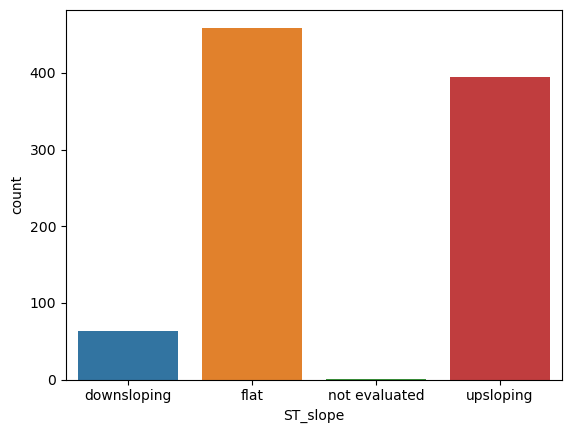

Value counts for ST_slope
flat             459
upsloping        395
downsloping       63
not evaluated      1
Name: count, dtype: int64 
 Proportions for ST_slope
flat             0.500000
upsloping        0.430283
downsloping      0.068627
not evaluated    0.001089
Name: proportion, dtype: float64 



<Figure size 640x480 with 0 Axes>

In [20]:
categorical_variables = ['sex', 'pain_type', 'fbs', 'ekg', 'stress_test', 'ST_slope']

plt.figure()

for variable in categorical_variables:
    sns.countplot(heart, x=variable)
    plt.show()
    plt.clf()
    print('Value counts for', heart[variable].value_counts(), '\n', 'Proportions for', heart[variable].value_counts(normalize=True), '\n')

#### Observations
* I found it interesting that almost as many participants had non-anginal pain as anginal (typical and atypical) pain (203 vs 219 participants)
* The EKG results make me wonder what the inclusion criteria were - I would not expect such a high percent (40%) of people with abnormal results in the general public.

### Comparison of categorical variables with heart disease outcome


Countplot of sex versus heart disease category:


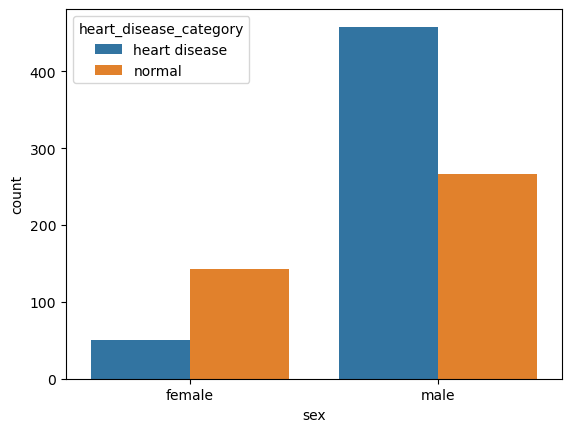

Contingency tables: Frequencies, expected values, and proportions

Frequencies
 heart_disease_category  heart disease  normal
sex                                          
female                             50     143
male                              458     267

Expected values
 [[106.80174292  86.19825708]
 [401.19825708 323.80174292]]

Frequencies minus expected values
 heart_disease_category  heart disease     normal
sex                                             
female                     -56.801743  56.801743
male                        56.801743 -56.801743

Proportions
 heart_disease_category  heart disease  normal
sex                                          
female                          25.91   74.09
male                            63.17   36.83

Statistical significance: Chi-squared test p-vale:  4.5976174508091635e-20

Countplot of pain_type versus heart disease category:


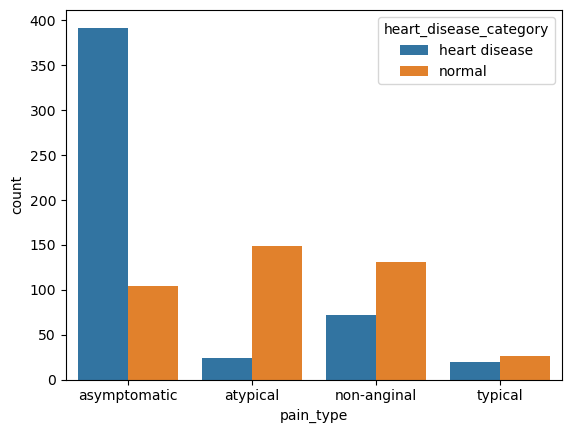

Contingency tables: Frequencies, expected values, and proportions

Frequencies
 heart_disease_category  heart disease  normal
pain_type                                    
asymptomatic                      392     104
atypical                           24     149
non-anginal                        72     131
typical                            20      26

Expected values
 [[274.47494553 221.52505447]
 [ 95.73420479  77.26579521]
 [112.33551198  90.66448802]
 [ 25.45533769  20.54466231]]

Frequencies minus expected values
 heart_disease_category  heart disease      normal
pain_type                                        
asymptomatic               117.525054 -117.525054
atypical                   -71.734205   71.734205
non-anginal                -40.335512   40.335512
typical                     -5.455338    5.455338

Proportions
 heart_disease_category  heart disease  normal
pain_type                                    
asymptomatic                    79.03   20.97
atypical             

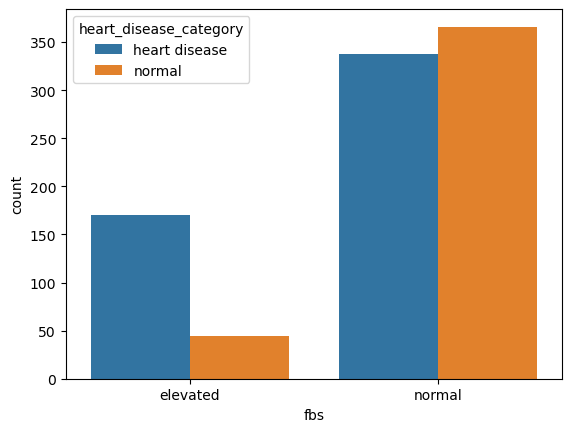

Contingency tables: Frequencies, expected values, and proportions

Frequencies
 heart_disease_category  heart disease  normal
fbs                                          
elevated                          170      44
normal                            338     366

Expected values
 [[118.42265795  95.57734205]
 [389.57734205 314.42265795]]

Frequencies minus expected values
 heart_disease_category  heart disease     normal
fbs                                             
elevated                    51.577342 -51.577342
normal                     -51.577342  51.577342

Proportions
 heart_disease_category  heart disease  normal
fbs                                          
elevated                        79.44   20.56
normal                          48.01   51.99

Statistical significance: Chi-squared test p-vale:  1.0573018731810034e-15

Countplot of ekg versus heart disease category:


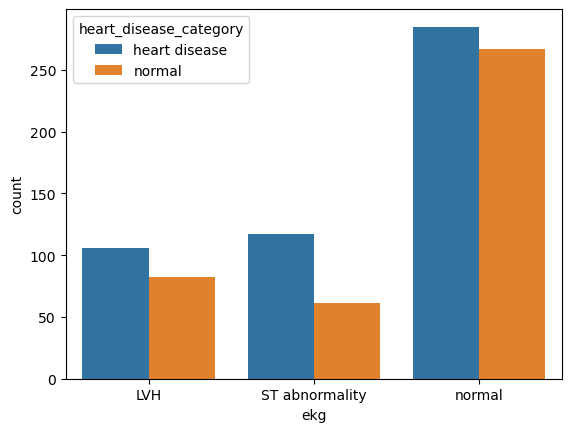

Contingency tables: Frequencies, expected values, and proportions

Frequencies
 heart_disease_category  heart disease  normal
ekg                                          
LVH                               106      82
ST abnormality                    117      61
normal                            285     267

Expected values
 [[104.03485839  83.96514161]
 [ 98.50108932  79.49891068]
 [305.46405229 246.53594771]]

Frequencies minus expected values
 heart_disease_category  heart disease     normal
ekg                                             
LVH                          1.965142  -1.965142
ST abnormality              18.498911 -18.498911
normal                     -20.464052  20.464052

Proportions
 heart_disease_category  heart disease  normal
ekg                                          
LVH                             56.38   43.62
ST abnormality                  65.73   34.27
normal                          51.63   48.37

Statistical significance: Chi-squared test p-vale:  0.0042

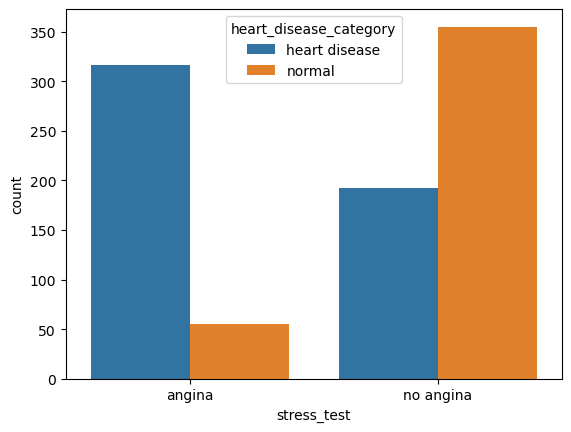

Contingency tables: Frequencies, expected values, and proportions

Frequencies
 heart_disease_category  heart disease  normal
stress_test                                  
angina                            316      55
no angina                         192     355

Expected values
 [[205.30283224 165.69716776]
 [302.69716776 244.30283224]]

Frequencies minus expected values
 heart_disease_category  heart disease      normal
stress_test                                      
angina                     110.697168 -110.697168
no angina                 -110.697168  110.697168

Proportions
 heart_disease_category  heart disease  normal
stress_test                                  
angina                          85.18   14.82
no angina                       35.10   64.90

Statistical significance: Chi-squared test p-vale:  2.907808387659878e-50

Countplot of ST_slope versus heart disease category:


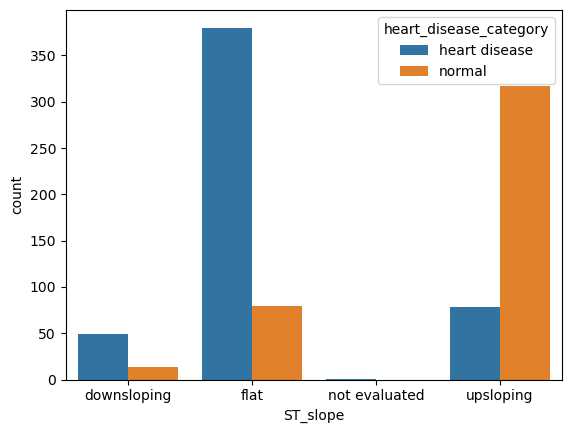

Contingency tables: Frequencies, expected values, and proportions

Frequencies
 heart_disease_category  heart disease  normal
ST_slope                                     
downsloping                        49      14
flat                              380      79
not evaluated                       1       0
upsloping                          78     317

Expected values
 [[ 34.8627451   28.1372549 ]
 [254.         205.        ]
 [  0.55337691   0.44662309]
 [218.583878   176.416122  ]]

Frequencies minus expected values
 heart_disease_category  heart disease      normal
ST_slope                                         
downsloping                 14.137255  -14.137255
flat                       126.000000 -126.000000
not evaluated                0.446623   -0.446623
upsloping                 -140.583878  140.583878

Proportions
 heart_disease_category  heart disease  normal
ST_slope                                     
downsloping                     77.78   22.22
flat                 

<Figure size 640x480 with 0 Axes>

In [25]:
pval_list = []
plt.figure()

for variable in categorical_variables:
    print('\nCountplot of {} versus heart disease category:'.format(variable))
    sns.countplot(heart, x=variable, hue='heart_disease_category')
    plt.show()
    plt.clf()
    print('Contingency tables: Frequencies, expected values, and proportions\n')
    frequencies = pd.crosstab(heart[variable], heart.heart_disease_category)
    print('Frequencies\n', frequencies)
    chi2, pval, dof, expected = chi2_contingency(frequencies)
    print('\nExpected values\n', expected)
    print('\nFrequencies minus expected values\n', frequencies-expected) # To help see where significance might be
    proportions = pd.crosstab(heart[variable], heart.heart_disease_category, normalize='index').round(4)*100
    print('\nProportions\n', proportions)
    pval_list.append(pval)
    if pval < 0.05:
        print('\nStatistical significance: Chi-squared test p-vale: ', pval)
    else:
        print('\nNo statistical significance: Chi-squared test p-vale: ', pval)

#### Comparing frequencies with expected values


In [ ]:
do tyhis next look at frequencies minus expected valuies

#### Comparing p-values

In [22]:
pval_series = pd.Series(pval_list)
categorical_series = pd.Series(categorical_variables)

pval_df = pd.concat([pval_series, categorical_series], axis=1)
sorted_pval = pval_df.sort_values(by=[0])

print('List of p-values sorted from smallest to largest:')
# Sorting is rather arbitrary at this point, since p-values are either significant or not significant; not scalable
print(sorted_pval)

List of p-values sorted from smallest to largest:
              0            1
5  7.348942e-77     ST_slope
1  8.083728e-58    pain_type
4  2.907808e-50  stress_test
0  4.597617e-20          sex
2  1.057302e-15          fbs
3  4.229233e-03          ekg


### Distribution of values
Numerical values are:
* Age
* Resting systolic blood pressure
* Cholesterol
* Max heart rate
* ST depression

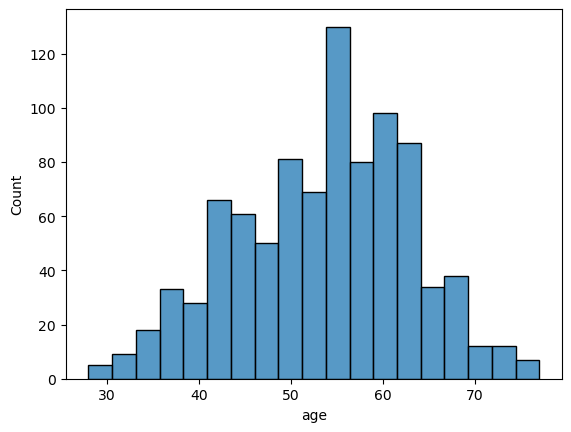

Reject the null hypothesis:
	The p-value is less than 0.05 ( 2.170366860809736e-05 ) 
	The statistic is 0.9910141825675964


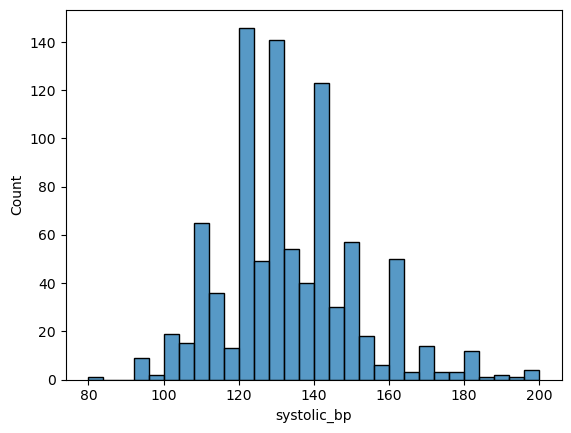

Failed to reject the null hypothesis: The p-value is greater than 0.05 ( 1.0 )


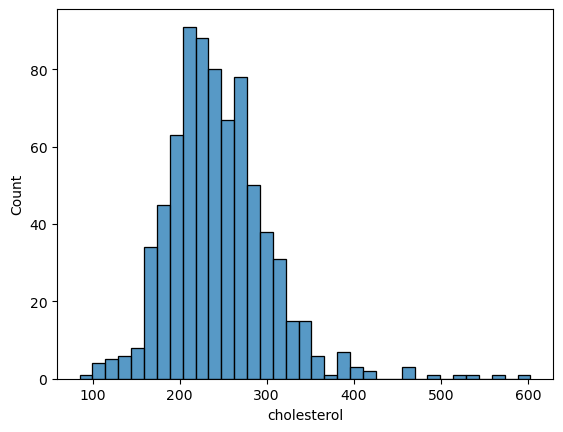

Failed to reject the null hypothesis: The p-value is greater than 0.05 ( 1.0 )


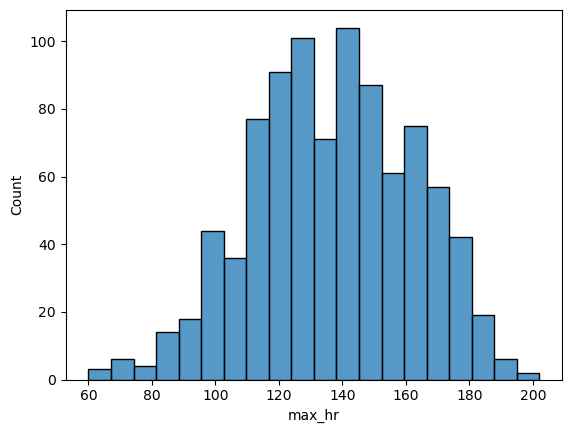

Reject the null hypothesis:
	The p-value is less than 0.05 ( 0.0001683219597907737 ) 
	The statistic is 0.9926717877388


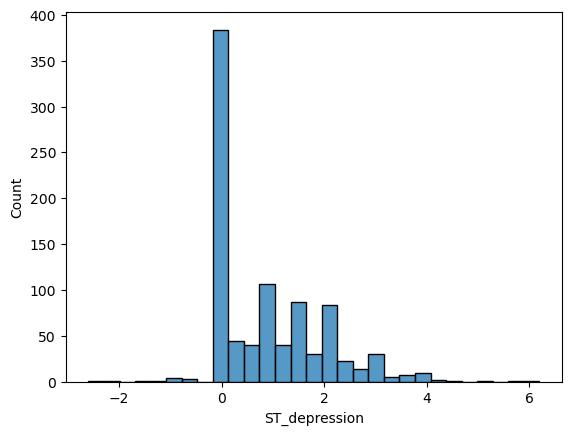

Reject the null hypothesis:
	The p-value is less than 0.05 ( 8.26949925434661e-28 ) 
	The statistic is 0.8598772287368774


<Figure size 640x480 with 0 Axes>

In [23]:
numerical_variables = ['age', 'systolic_bp', 'cholesterol', 'max_hr', 'ST_depression']

plt.figure()
for variable in numerical_variables:
    sns.histplot(x=variable, data=heart)
    plt.show()
    plt.clf()
    res = stats.shapiro(heart[variable])
    if res.pvalue < 0.05:
        print('Reject the null hypothesis:\n\tThe p-value is less than 0.05 (', str(res.pvalue), ')', 
              '\n\tThe statistic is', str(res.statistic))
    else: print('Failed to reject the null hypothesis: The p-value is greater than 0.05 (', str(res.pvalue), ')')

#### Observations:
* Distributions do not appear to be normal.
* Age: The mode was the 55 years-old bin.
* Resting systolic blood pressure: 
    * It seems that there are bumps near nice round numbers: 120, 130, 140 mmHg, etc.
    * Some positive skew
* Cholesterol: 
    * There are a number of outliers, resulting in positive skewness
    * Positive kurtosis
* Max heart rate is the most normal-looking, except for the bimodal peaks.
* ST depression: Large majority were normal (zero), it looked like mist results were cliustered near whole numbers.

#### Shapiro-Wilk discussion:
* I would like to do this more out of curiosity and practice than statistical necessity.
* The dataset contains less than 1,000 rows, so the test should function properly.
* The purpose of this project is not for the statistics; I will arbitrarily use p<0.05 as an indicator of significance, knowing there are other factors that could impact the size of the p-value.

#### Shapiro-Wilk results:
Rejected the null hypothesis (non-normal distribution):
* Age
* Max heart rate
* ST depression

Failed to reject the null (could mean normal distribution):
* Systolic blood pressure
* Cholesterol

In [24]:
next time do stats on quantitativbe veauitraelbrtywasfds

SyntaxError: invalid syntax (2705973237.py, line 1)